# scraping project for intro to data science

In [9]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tkinter import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoCV, Lasso,Ridge, RidgeCV

## aid functions:

In [10]:
def maximum(grades):
    m = grades[0]
    for lis in grades:
        if(lis[0]>m[0]):
            m = lis
    return m

In [11]:
def poly_gridsearch_r2(X,y):
    grades = []
    for n in range(1,10):
        for bias in [True,False]:
            for interaction in [True,False]:
                for intercept in [True,False]:
                    pre_process = PolynomialFeatures(degree=n,include_bias=bias,interaction_only=interaction)
                    X_poly = pre_process.fit_transform(X)
                    linreg = LinearRegression(fit_intercept=intercept)
                    scores = cross_val_score(linreg,X_poly,y,cv=10,scoring="r2")
                    grades.append([scores.mean(),n,bias,interaction,intercept])
    return maximum(grades)

In [12]:
def show_regresion_error(true_values, predictions):
    print("Root Mean squared error (test):",mean_squared_error(true_values, predictions, squared=False))
    print("Mean absolute error (test):",mean_absolute_error(true_values, predictions ))
    print("R2:",r2_score(true_values,predictions))

In [13]:
def zero_model(num,y):
    y_pred_z = pd.Series([num for x in range(len(df))])
    print("*zero model* rmse: ",mean_squared_error(y,y_pred_z,squared=False))
    print("*zero model* mae:",mean_absolute_error(y,y_pred_z))

# intro:
### in this project we are taking cars sales ads from the "komo" website using web-crawling. in the site all the sales add are divided into 4 car categories: private, commersial, jeeps and trucks. in every sale ad their are the following info about the cars: "price","km driven","year of prudaction" and some uninmportent info. we know that this data isn't going to yield the best results beacuase the lack of some importent features as the car's model ,if the car have manual transmission or automatic transmission, but we'll try to make the most out of it.

# scraping the data:

In [14]:
## our target website haven't got all the sale ads in one url
## so we'll go throgh all of the urls that store the sale ads
## first we'll store them in a list:
links = []
for style in ["private","commercial","jeeps","trucks"]:
    for x in [("https://www.komo.co.il/code/cars/"+style+".asp?currPage="+y+"&subLuachNum=1&collapsed=1") for y in ["1","2","3","4","5","6","7","8","9","10"]]:
        links.append(x)

In [15]:
 ## the following code aproves that we have all the links we need:
links

['https://www.komo.co.il/code/cars/private.asp?currPage=1&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=2&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=3&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=4&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=5&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=6&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=7&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=8&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=9&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/private.asp?currPage=10&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/commercial.asp?currPage=1&subLuachNum=1&collapsed=1',
 'https://www.komo.co.il/code/cars/commercial.asp?

In [16]:
        ## now w'll make a list of the soup varables of the
        ## websites!
        ### note that the code below requests information from 40
        ### websites so it might take up to a minate for it to end 
        ### all the requests
soups = []
for x in links:
    page = requests.get(x)
    soup = BeautifulSoup(page.text,"html.parser")
    soups.append(soup)

In [17]:
   ## now we'll use all the soup variables to 
        ## get the data we need!
data = []
for x in soups:
    for tr in (x.findAll("tr" ,bgcolor="#FFFFFF")):
        values = [td.text for td in tr.findAll("td")]
        data.append(values)

In [18]:
        ## the code below approve that we have all the needed data
        ## and the amount of samples matches the value we expected.
        ## that's beacuse we took information from 40 websites 
        ## which on every one of them there are 20 sale ads!
print(len(data))


800


In [19]:
        ## the code below tells us that all the details about the cars
        ## are stored in string varbales so we will change them to 
        ## int type in the foregoing
print(type(data[0][0]))
print(type(data[10][1]))
print(type(data[80][2]))
print(type(data[120][3]))
print(type(data[500][4]))
print(type(data[600][5]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [20]:
        ## now we are turning the data list into a dataframe!
df = pd.DataFrame(data,columns=["car_type","firm","area","km","cost","year of prudaction","time of ad"])
df

,car_type,firm,area,km,cost,year of prudaction,time of ad
0,רכב פרטי,פיאט - 500X,מושבים בשרון,36000,"69,000 ₪",2017,1 ימים
1,רכב פרטי,פיג’ו - 208,חיפה וחוף הכרמל,100000,"28,500 ₪",2014,3 שעות
2,רכב פרטי,יונדאי - i30,ירושלים והסביבה,209000,"30,500 ₪",2013,3 שעות
3,רכב פרטי,ב.מ.וו - סדרה 7,ירושלים והסביבה,220000,"89,500 ₪",2010,4 שעות
4,רכב פרטי,מאזדה - 3,תל אביב,19000,"102,000 ₪",2017,25 ימים
...,...,...,...,...,...,...,...
795,משאיות,פיג’ו - בוקסר ארוך גבוה דיזל,חולון - בת ים,109000,"70,000 ₪",2015,10 ימים
796,משאיות,מיצובישי - Canter,אשדוד - אשקלון,226000,"65,000 ₪",2010,10 ימים
797,משאיות,שברולט - סילברדו,רעננה - כפר סבא,226500,"97,100 ₪",2017,10 ימים
798,משאיות,וולוו - Fh 460 EURO 6,מושבים בצפון,123456789,"1,000 ₪",2018,10 ימים


# cleaning the data:
        

### note that we saved the df ahead of time, so that all the analysis and operations that we made to it would be conssistent.

In [22]:
        ## we saved the df ahead of time
df = pd.read_csv("data/saved_data.csv").iloc[:,1:]
df.head(2)

,car_type,firm,area,km,cost,year of prudaction,time of ad
0,רכב פרטי,מאזדה - 3,תל אביב,19000,"102,000 ₪",2017,24 ימים
1,רכב פרטי,קיה - סיד,רמלה - לוד,175000,"43,210 ₪",2016,5 שעות


In [23]:
        ## cheking if the data have resonable values:
print("car types:",df.car_type.unique(),'\n')
print(df.car_type.value_counts(),'\n')
print("different costs of *cars*(all types):",len(df.cost.unique()),'\n')
print("different costs of *privates*:",len(df[df.car_type == "רכב פרטי"].cost.unique()),'\n')
print("different costs of *comercial*:",len(df[df.car_type == "רכב מסחרי"].cost.unique()),'\n')
print("different cost of *jeeps*:",len(df[df.car_type == "ג'יפים"].cost.unique()),'\n')
print("different cost of *trucks*:",len(df[df.car_type == "משאיות"].cost.unique()))
    ## in the code below we can see that
    ## the amount of unique cost seems resonable - there isn't too much repetition,
    ## so the data looks fine.

car types: ['רכב פרטי' 'רכב מסחרי' "ג'יפים" 'משאיות'] 

רכב פרטי     200
רכב מסחרי    200
ג'יפים       200
משאיות       200
Name: car_type, dtype: int64 

different costs of *cars*(all types): 232 

different costs of *privates*: 109 

different costs of *comercial*: 95 

different cost of *jeeps*: 125 

different cost of *trucks*: 62


In [24]:
        ## i wanted to use the car firm as a feature
        ## but we can see in the code below that the
        ## name given to each car in the website 
        ## is the firm of the car and the model of the
        ## car - and that's without a pattern (sometimes
        ## the firm name is first and sometimes the model name
        ## is first),hence it would be a painstaking work to-
        ## categorize all the cars to their firms as a feature.
        ## so we'll drop this column.
print(len(df.firm.unique()))
df.firm.unique()

374


array(['מאזדה - 3', 'קיה - סיד', 'מרצדס - E-CLASS', 'מאזדה - 5',
       'ב.מ.וו - סדרה 5', 'פיג’ו - 208', 'הונדה - ג’אז', 'פורד - פיאסטה',
       'יונדאי - i10', 'פיאט - 500X', 'טויוטה - יאריס', 'טויוטה - אוריס',
       'יונדאי - אלנטרה', 'סוזוקי - בלנו', 'יונדאי - i35', 'פיג’ו - 2008',
       'סקודה - סופרב', 'שברולט - מאליבו', 'קיה - פיקנטו', 'סובארו - XV',
       'סובארו - אאוטבק', 'שברולט - קרוז', 'סוזוקי - SX4', 'אופל - אסטרה',
       'טויוטה - פריוס', 'סקודה - אוקטביה', 'אאודי - A7',
       'סוזוקי - איגניס', 'הונדה - סיוויק', 'פיאט - פונטו ספייס',
       'טויוטה - קורולה', 'סובארו - B4', 'רנו - קליאו B',
       'ב.מ.וו - סדרה 4', 'הונדה - אקורד', 'סוזוקי - סוויפט',
       'פיאט - 500', 'ניסאן - ', 'יונדאי - i20', 'אלפא רומאו - ג’ולייטה',
       'הונדה - סיוויק האצ’בק החדשה', 'שברולט - אקווינוקס',
       'סיטרואן - C אליזה', 'פורד - מונדאו', 'טויוטה - C-HR',
       'רנו - גרנד קופה', 'סוזוקי - קרוסאובר', 'רנו - קפצ’ור',
       'מאזדה - 2', 'וולוו - S60', 'רנו - קליאו אסטייט', 'קי

In [25]:
        ## according to the explnation in the above cell - we won't use the "firm" column as 
        ## a feature.
        ## and the "time of add" column is redundent (this column notes the time the ad was on the 
        ## website)
        ## so we'll drop those two.
df = df.drop(["firm","time of ad"],axis=1)
df

,car_type,area,km,cost,year of prudaction
0,רכב פרטי,תל אביב,19000,"102,000 ₪",2017
1,רכב פרטי,רמלה - לוד,175000,"43,210 ₪",2016
2,רכב פרטי,חיפה וחוף הכרמל,129000,"70,000 ₪",2009
3,רכב פרטי,חיפה וחוף הכרמל,144000,"57,000 ₪",2012
4,רכב פרטי,חיפה וחוף הכרמל,138853,"38,500 ₪",2010
...,...,...,...,...,...
795,משאיות,באר שבע והסביבה,12100,לא צויין,2017
796,משאיות,רעננה - כפר סבא,226500,"97,100 ₪",2017
797,משאיות,כרמיאל והסביבה,560000,"68,000 ₪",2008
798,משאיות,אשדוד - אשקלון,226000,"65,000 ₪",2010


In [26]:
        ## we'll make sure there isn't null values:
df.isnull().sum()

car_type              0
area                  0
km                    0
cost                  0
year of prudaction    0
dtype: int64

In [27]:
        ## there is no null values but yet not all of the "cost" values
        ## are numbers that's beacause some sellers didn't mention the
        ## price of the vechile.
        ## now we'll delete the rows where the sale ad didn't 
        ## had a price
df = df[df.cost != "לא צויין"]
df

,car_type,area,km,cost,year of prudaction
0,רכב פרטי,תל אביב,19000,"102,000 ₪",2017
1,רכב פרטי,רמלה - לוד,175000,"43,210 ₪",2016
2,רכב פרטי,חיפה וחוף הכרמל,129000,"70,000 ₪",2009
3,רכב פרטי,חיפה וחוף הכרמל,144000,"57,000 ₪",2012
4,רכב פרטי,חיפה וחוף הכרמל,138853,"38,500 ₪",2010
...,...,...,...,...,...
793,משאיות,אשדוד - אשקלון,177000,"142,000 ₪",2018
794,משאיות,קריות,330000,"30,000 ₪",2006
796,משאיות,רעננה - כפר סבא,226500,"97,100 ₪",2017
797,משאיות,כרמיאל והסביבה,560000,"68,000 ₪",2008


In [28]:
        ## now we'll make a function that can turn
        ## "cost" column (which are of type string)
        ## to an int type
to_cost = lambda x:int(x[0:-2].replace(",",""))
to_int = lambda x : int(x)
df.cost = df.cost.apply(to_cost)
df.km = df.km.apply(to_int)
df["year of prudaction"] = df["year of prudaction"].apply(to_int)

C:\Users\noams\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\noams\AppData\Local\Temp/ipykernel_12280/2934150884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year of prudaction"] = df["year of prudaction"].apply(to_int)


In [29]:
        ## cheking if the type of the columns "km","cost" and "year of prudaction" have changed to int:
print(type(df.km[0]))
print(type(df.cost[0]))
print(type(df["year of prudaction"][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [30]:
        ## note that the "car_type" column is a string column that have
        ## 4 possible values: "רכב פרטי","רכב מסחרי","גיפים","משאיות"
        ## we can't use this column as a feature just yet beacuase it's
        ## a string, we could decide that רכב פרטי=1, רכב מסחרי=2, גיפים=3, but if
        ## we'll do so we'll create a bias for the model that "רכב פרטי" is somehow more "closer"
        ## to "רכב מסחרי" from "גיפים", which we don't want so we'll use dummy variables insted:
type_dummies = pd.get_dummies(df.car_type).iloc[:,1:]
df = pd.concat([df,type_dummies], axis = 1)
df

,car_type,area,km,cost,year of prudaction,משאיות,רכב מסחרי,רכב פרטי
0,רכב פרטי,תל אביב,19000,102000,2017,0,0,1
1,רכב פרטי,רמלה - לוד,175000,43210,2016,0,0,1
2,רכב פרטי,חיפה וחוף הכרמל,129000,70000,2009,0,0,1
3,רכב פרטי,חיפה וחוף הכרמל,144000,57000,2012,0,0,1
4,רכב פרטי,חיפה וחוף הכרמל,138853,38500,2010,0,0,1
...,...,...,...,...,...,...,...,...
793,משאיות,אשדוד - אשקלון,177000,142000,2018,1,0,0
794,משאיות,קריות,330000,30000,2006,1,0,0
796,משאיות,רעננה - כפר סבא,226500,97100,2017,1,0,0
797,משאיות,כרמיאל והסביבה,560000,68000,2008,1,0,0


In [31]:
        ## we'll rename the variables to english
        ## and drop the "car_type" column since
        ## we don't need it anymore
df = df.rename(columns={"רכב פרטי":"private","רכב מסחרי":"commercial","משאיות":"tracks"})
df = df.drop(columns={"car_type"})
df

,area,km,cost,year of prudaction,tracks,commercial,private
0,תל אביב,19000,102000,2017,0,0,1
1,רמלה - לוד,175000,43210,2016,0,0,1
2,חיפה וחוף הכרמל,129000,70000,2009,0,0,1
3,חיפה וחוף הכרמל,144000,57000,2012,0,0,1
4,חיפה וחוף הכרמל,138853,38500,2010,0,0,1
...,...,...,...,...,...,...,...
793,אשדוד - אשקלון,177000,142000,2018,1,0,0
794,קריות,330000,30000,2006,1,0,0
796,רעננה - כפר סבא,226500,97100,2017,1,0,0
797,כרמיאל והסביבה,560000,68000,2008,1,0,0


# visualizing the data:

array([[<AxesSubplot:title={'center':'km'}>,
        <AxesSubplot:title={'center':'cost'}>],
       [<AxesSubplot:title={'center':'year of prudaction'}>,
        <AxesSubplot:title={'center':'tracks'}>],
       [<AxesSubplot:title={'center':'commercial'}>,
        <AxesSubplot:title={'center':'private'}>]], dtype=object)

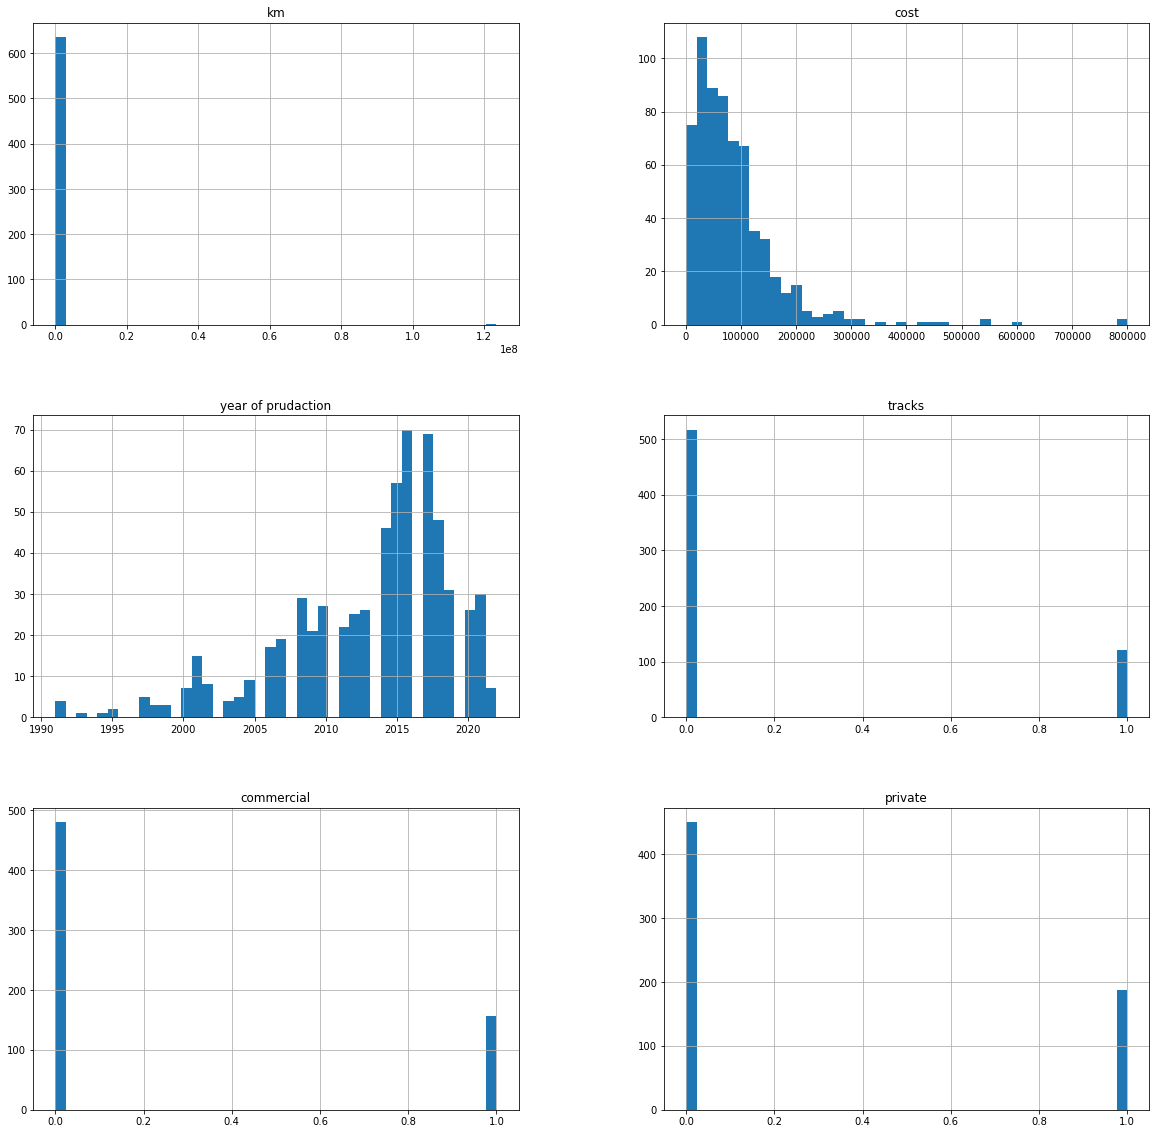

In [32]:
        ## let's start visulazie the data:
df.hist(figsize=(20,20),bins=42)

In [35]:
    ## we can see that there was a typo in the km column, in one of the sales the mentioned km was 10**8 which is of course
    ## nonsence and probebly a typo
    ## there is only sale ad with such a typo so we'll just drop this row.
print("number of sales with huge km value:",len(df[df["km"]>=10**6]))
df = df[df["km"]<=10**6]

number of sales with huge km value: 0


array([[<AxesSubplot:title={'center':'km'}>,
        <AxesSubplot:title={'center':'cost'}>],
       [<AxesSubplot:title={'center':'year of prudaction'}>,
        <AxesSubplot:title={'center':'tracks'}>],
       [<AxesSubplot:title={'center':'commercial'}>,
        <AxesSubplot:title={'center':'private'}>]], dtype=object)

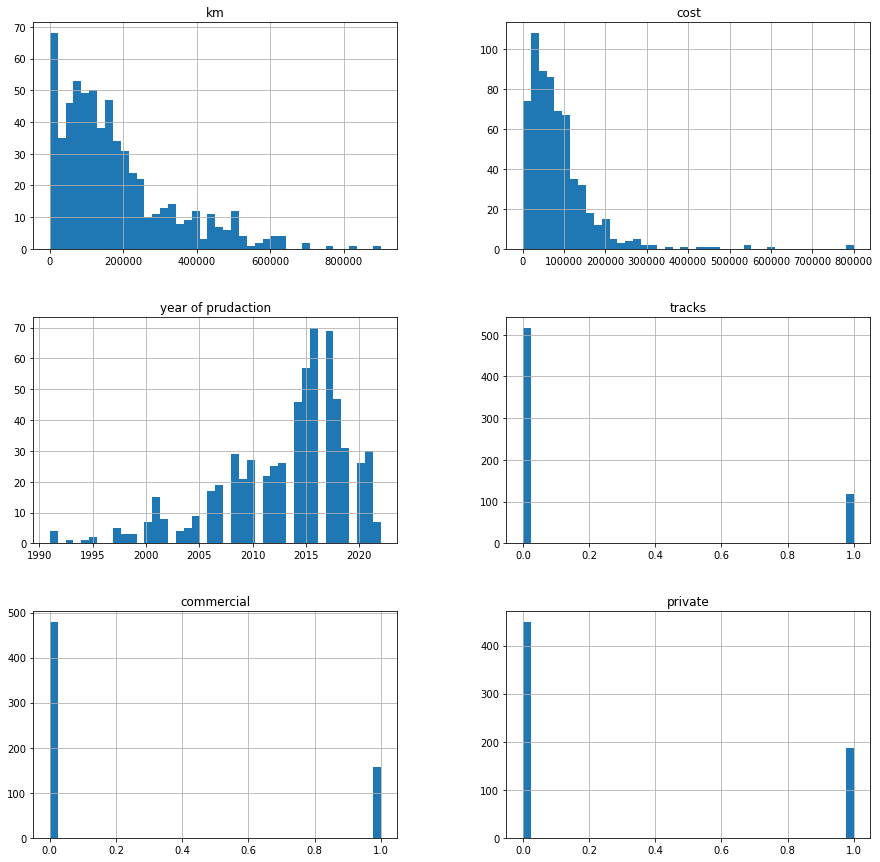

In [36]:
df.hist(figsize=(15,15),bins=42)

In [40]:
    ## we can see there is alot of outliers in the "cost" column, there is very little sales ads where the
    ## price is above 200_000 but all those sales ads are very varied, same goes for the km colum.
    ## so in order to make the model much more accurate we will drop those values.
    ## (we saved a model with these outliers values in saved_data_with_outliers.csv file,
    ## and showed how we created it in making data with outliers.ipynb file)
print(df[df["cost"]>=200_000].shape[0])
print(df[df["km"]>=600_000].shape[0])
df = df[(df["cost"]<=200_000)&(df["km"]<=600_000)]
df

7
4


,area,km,cost,year of prudaction,tracks,commercial,private
0,תל אביב,19000,102000,2017,0,0,1
1,רמלה - לוד,175000,43210,2016,0,0,1
2,חיפה וחוף הכרמל,129000,70000,2009,0,0,1
3,חיפה וחוף הכרמל,144000,57000,2012,0,0,1
4,חיפה וחוף הכרמל,138853,38500,2010,0,0,1
...,...,...,...,...,...,...,...
793,אשדוד - אשקלון,177000,142000,2018,1,0,0
794,קריות,330000,30000,2006,1,0,0
796,רעננה - כפר סבא,226500,97100,2017,1,0,0
797,כרמיאל והסביבה,560000,68000,2008,1,0,0


array([[<AxesSubplot:title={'center':'km'}>,
        <AxesSubplot:title={'center':'cost'}>],
       [<AxesSubplot:title={'center':'year of prudaction'}>,
        <AxesSubplot:title={'center':'tracks'}>],
       [<AxesSubplot:title={'center':'commercial'}>,
        <AxesSubplot:title={'center':'private'}>]], dtype=object)

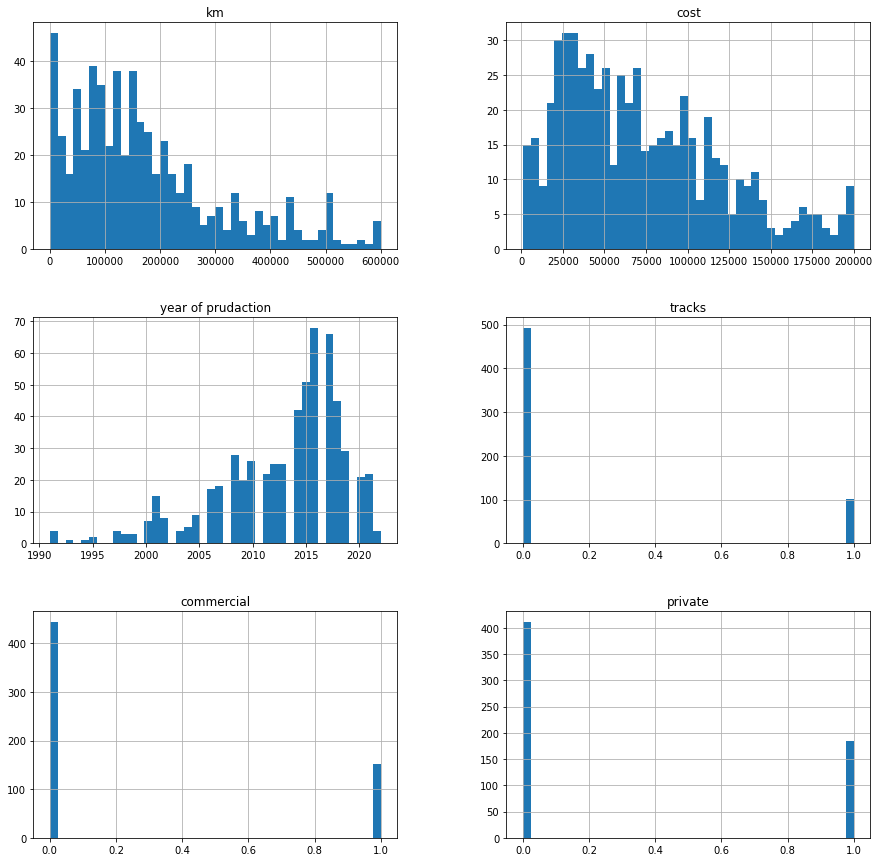

In [41]:
df.hist(figsize=(15,15),bins=42)

In [42]:
    ## right now we can't use the "area" column as a feature beacause it's of type string.
    ## lets see if we divide this column into dummy variables:
df.area.unique()

array(['תל אביב', 'רמלה - לוד', 'חיפה וחוף הכרמל', 'גדרה יבנה והסביבה',
       'עכו - נהריה', 'נס ציונה - רחובות', 'רמת גן - גבעתיים',
       'רמת השרון - הרצליה', 'אשדוד - אשקלון', 'מושבים בשרון',
       'פתח תקוה והסביבה', 'ראשל"צ והסביבה', 'ירושלים והסביבה',
       'בקעת אונו', 'חולון - בת ים', 'מושבים בצפון', 'כרמיאל והסביבה',
       'בית שמש והסביבה', 'נתניה והסביבה', 'טבריה והסביבה', 'קריות',
       'מודיעין והסביבה', 'עמק יזרעאל', 'רעננה - כפר סבא',
       'באר שבע והסביבה', 'יישובי השומרון', 'חדרה וישובי עמק חפר',
       'הוד השרון והסביבה', 'גליל ועמקים', 'זכרון - בנימינה',
       'מושבים בדרום', 'מושבים בשפלה', 'אזור צפון', 'מושבים במרכז',
       'אילת והערבה'], dtype=object)

In [456]:
#     we can see in the cell above that there is too much diffrent values in "area" column
#     so we can't divie it to dummiy variables
#     but we'll walk throgh the options manually and make a function that will create a new
#     column which divieds the values in "area" to "north","south","center","jerosalem"
#     this func will be implemented in another notebook called 'making data with area.ipynb'
#     and in this notebook we'll just use the df created with this func and that has dummiy
#     variables that represent "north","south","center","jerosalem".
#     but for now we'll delete the "area" column.

In [43]:
    ## we'll delete the "area" column in df
df.drop(columns="area",inplace=True)

In [44]:
        ## we'll rearange the the data frame so that cost will be the first column:
df = df[["cost","km","year of prudaction","tracks","commercial","private"]]
df

,cost,km,year of prudaction,tracks,commercial,private
0,102000,19000,2017,0,0,1
1,43210,175000,2016,0,0,1
2,70000,129000,2009,0,0,1
3,57000,144000,2012,0,0,1
4,38500,138853,2010,0,0,1
...,...,...,...,...,...,...
793,142000,177000,2018,1,0,0
794,30000,330000,2006,1,0,0
796,97100,226500,2017,1,0,0
797,68000,560000,2008,1,0,0


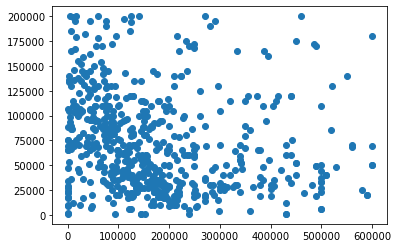

In [45]:
        ## now lets see the connection beatween the features and the target:
import matplotlib.pyplot as plt
plt.plot(df["km"],df.cost,"o")


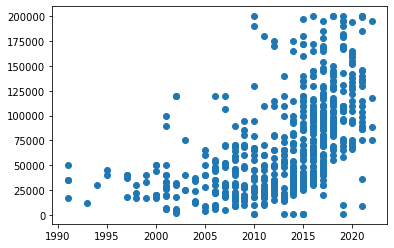

In [46]:
plt.plot(df["year of prudaction"],df.cost,"o")

In [47]:
    ## it's seems that the relation between the "year of prudacion" and the "cost" is roghtlly of second power,
    ## and that the relation between "km" and "cost" is more complcated then a linear relation
    ## so polynomial reggretion should bring better results then linear reggretion.

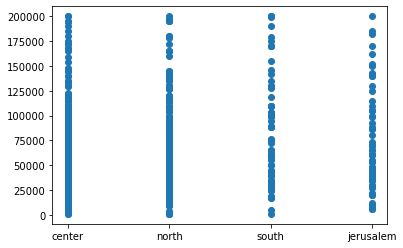

In [49]:
    ## now let's check if the new feature that we talked about- "area" can help the model preform better:
    ## note that we didn't created the temp df in this notebook but in notebook called 
    ## "making data for visualization.ipynb" and we "read" it from our data folder.
temp = pd.read_csv("data/saved_data_for_visual.csv").iloc[:,1:]
plt.plot(temp["area"],temp.cost,"o")

In [51]:
    ## it's seems there isn't alot of information coming from the "area"
    ## feature, and it could bias the model to overfitting
    ## since there is alot of overlapping prices bellow 200,000 shekel.
    ## so in this notebook we'll keep creating df without the columns: "jerusalem","north" and "south",
    ## and without the "area" feature.

# finding the best model:

In [58]:
    ## importing sklearn for model trainig:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [53]:
    ## spliting to test and train:
X = df.iloc[:,1:len(df.columns)]
y = df.iloc[:,0]

In [54]:
    ## training linear reggretion
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
linreg = LinearRegression().fit(X_train,y_train)
y_pred = linreg.predict(X_test)
show_regresion_error(y_test,y_pred)

normal_linreg_r2 = r2_score(y_test,y_pred)

Root Mean squared error (test): 35517.12030147108
Mean absolute error (test): 26797.50524292276
R2: 0.3901972508936504


In [56]:
                 ## finding the best polynomial regression:
                 ## takes up to 20 seconds
b_grade = poly_gridsearch_r2(X,y)
print(b_grade)
normal_poly_r2_ave = b_grade[0]

[0.4035030025732083, 3, True, False, True]


In [60]:
        ## implementing the best polynomial regretion.
pre_process = PolynomialFeatures(degree=b_grade[1],include_bias=b_grade[2],interaction_only=b_grade[3])
X_poly = pre_process.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1)

linreg = LinearRegression(fit_intercept=b_grade[4])
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
show_regresion_error(y_test,y_pred)

normal_poly_r2 = r2_score(y_test,y_pred)

Root Mean squared error (test): 33965.06403611723
Mean absolute error (test): 25946.475877300203
R2: 0.44232810131205635


## the model choosen is a polinomial regretion with 3 power, which have a r2 score of 0.44.
## let's see how good our model can do against the zero model

In [61]:
    ## now let's compere our model with the zero model, which for a regretion could be seen as a model
    ## that allways says that the price of the car is the mean/median
zero_model(df.cost.mean(),y)
print()
zero_model(df.cost.median(),y)
print()
show_regresion_error(y_test,y_pred)

*zero model* rmse:  47996.98271782729
*zero model* mae: 39477.90300120048

*zero model* rmse:  48602.6409010661
*zero model* mae: 38821.83529411765

Root Mean squared error (test): 33965.06403611723
Mean absolute error (test): 25946.475877300203
R2: 0.44232810131205635


## let's see how good our model predicted against some veriants of the model that we hypothesized would have worse preformence then ours

In [62]:
## now after we made the wanted model we can see if our predictions about the "area" feature and the deletion of
## the outliers made the model better

In [66]:
        ## importing the saved_data_with_area dataframe
        ## this df have dummiy variables that represent the
        ## location of the sale with 4 options: "north","south",
        ## "center","jerusalem".
df_area = pd.read_csv("data/saved_data_with_area.csv").iloc[:,1:]
        ## spliting to test and train:
X1 = df_area.iloc[:,1:len(df_area.columns)]
y1 = df_area.iloc[:,0]

area_poly_r2_ave = poly_gridsearch_r2(X1,y1)[0]
print("model with area feature average r2:",area_poly_r2_ave)

model with area feature average r2: 0.3118854141103536


In [68]:
    ## importing the saved_data_with_outlierr dataframe
    ## this df have the outliers that we droped erlier
    ## the outlier where few sampels (aroud 40) that had
    ## a "km" and "cost" value wayy higher then the rest
    ## of the data.
df_outlier = pd.read_csv("data/saved_data_with_outliers.csv").iloc[:,1:]

X1 = df_outlier.iloc[:,1:len(df_outlier.columns)]
y1 = df_outlier.iloc[:,0]

outlier_poly_r2_ave = poly_gridsearch_r2(X1,y1)[0]
print("model with outliers average r2:",outlier_poly_r2_ave)

model with outliers average r2: 0.2624175585767106


## and indeed we can see that the mean score of our original model was better then the model with the outliers (by far better) and better then the model with the "area" feature.

In [69]:
print("*our* model average r2:",normal_poly_r2_ave)
print("*outlier* model average r2:",outlier_poly_r2_ave)
print("*area* model average r2:",area_poly_r2_ave)

*our* model average r2: 0.4035030025732083
*outlier* model average r2: 0.2624175585767106
*area* model average r2: 0.3118854141103536


### to sum up we made a model that uses very little information about vehicles ("km","year of prudaction") and made much more accurate by specifying the model for cars that cost below 200,000 shekels and drove less then 600,000 km. we managed to evoid feature overfiting and made better model than regular linear reggresion
# all the scores:

In [73]:
print("*our* model average r2:",normal_poly_r2_ave)
print()
print("*outlier* model average r2:",outlier_poly_r2_ave)
print("*area* model average r2:",area_poly_r2_ave)
print()
zero_model(df.cost.mean(),y)

*our* model average r2: 0.4035030025732083

*outlier* model average r2: 0.2624175585767106
*area* model average r2: 0.3118854141103536

*zero model* rmse:  47996.98271782729
*zero model* mae: 39477.90300120048


### i think i could next time use some scaling method, and would love to fighre out how to engage in this model building without getting overwhelmed, especially when i try to show multiple dataframes in the same notebook. i think i would want to make more sense out of the result of the model- for example to learn how to tell the standard devietion of the error of the model.